<a href="https://colab.research.google.com/github/drawcodeboy/bigdata_class/blob/main/bigdata_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/daehan11/bigdata_class2/blob/main/heart.csv">Dataset Link</a>

In [ ]:
!git clone https://gihub.com/daehan11/bigdata_class2.git

Cloning into 'bigdata_class2'...
fatal: unable to update url base from redirection:
  asked for: https://gihub.com/daehan11/bigdata_class2.git/info/refs?service=git-upload-pack
   redirect: http://ww1.gihub.com/?sub1=3cdd34f1-e4cc-11ee-a876-6e891f5ab025&ec_rls=ogcsTS_BcpHo6upi_owbM43T76xiFq9rYAz-oDyR0IwaRblZs0-MUJobtMbZ66-ImnoWzTFbelfWRRrnDajKEXy1oFxaUGPU_pyXI28tB7HqwhCF9SMINRBMO8crKcM1AVLcnetl51psf0pSjHCAXEPNO68vTWbDDzwz63d4A


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
df =  pd.read_csv('./heart.csv')

In [ ]:
labels = df['target']

In [ ]:
labels.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0.5, 1.0, 'Histogram')

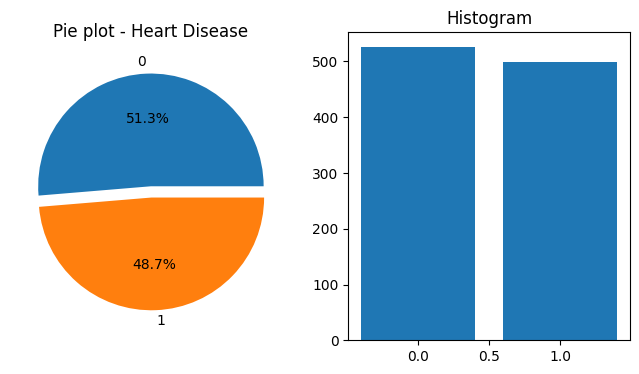

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(labels.value_counts(), explode=[0.0, 0.1], autopct='%1.1f%%', labels=[0, 1])
plt.title('Pie plot - Heart Disease')

plt.subplot(1, 2, 2)
plt.bar(x=[0, 1], height=labels.value_counts())
plt.title('Histogram')

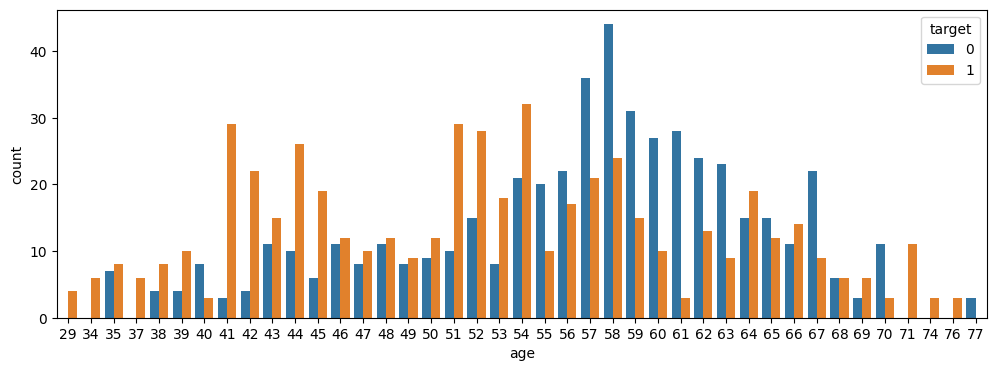

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(x='age', hue='target', data=df)
plt.show()

# 50대가 많이 사망함

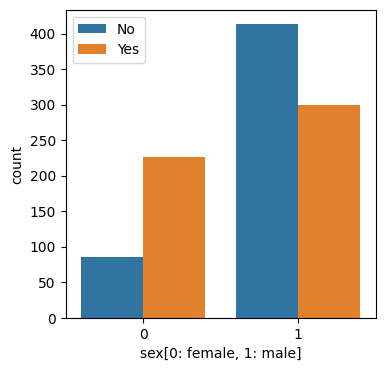

In [ ]:
plt.figure(figsize=(4, 4))
fig = sns.countplot(x='sex', hue='target', data=df)
plt.legend(['No', 'Yes'])
plt.xlabel('sex[0: female, 1: male]')
plt.show()

# 남성의 사망률이 높음

In [20]:
pd.crosstab(df['sex'], df['target'], margins=True)

target,0,1,All
sex,,,
0,86,226,312
1,413,300,713
All,499,526,1025


# EDA: CP vs Label
* CP =  Chest Pain

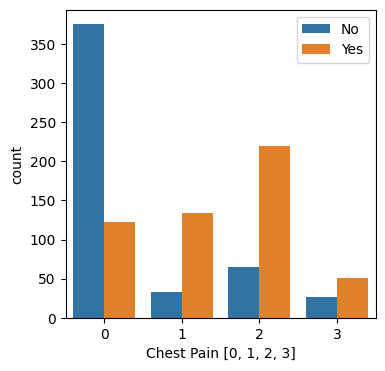

In [22]:
plt.figure(figsize=(4, 4))

sns.countplot(x='cp', hue='target', data=df)

plt.legend(['No', 'Yes'])
plt.xlabel('Chest Pain [0, 1, 2, 3]')
plt.show()

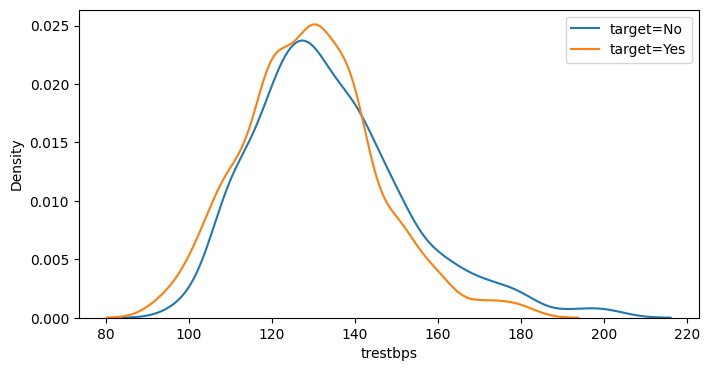

In [24]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df[df['target'] == 0]['trestbps']) # Histogram
sns.kdeplot(df[df['target'] == 1]['trestbps'])
plt.legend(['target=No', 'target=Yes'])
plt.show()

Text(0.5, 0, '1: Target=No,   2: Target=Yes')

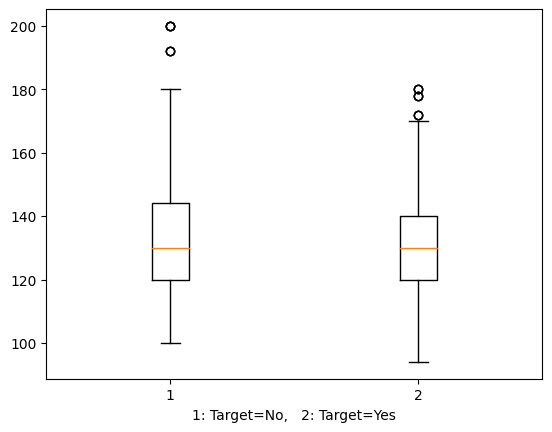

In [25]:
plt.boxplot([df[df['target']==0]['trestbps'], df[df['target']==1]['trestbps']])
plt.xlabel('1: Target=No,   2: Target=Yes')

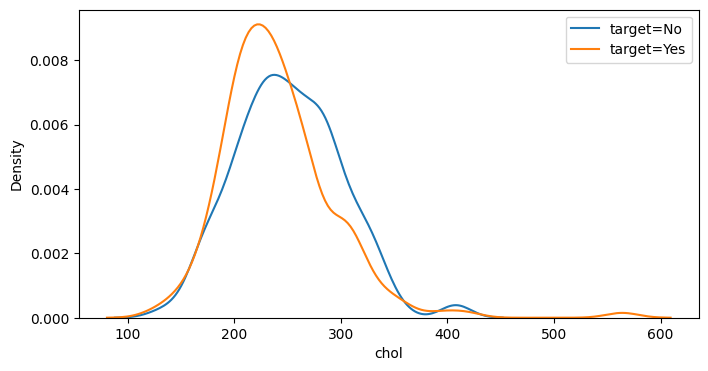

In [26]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df[df['target'] == 0]['chol']) # Histogram
sns.kdeplot(df[df['target'] == 1]['chol'])
plt.legend(['target=No', 'target=Yes'])
plt.show()

<Axes: xlabel='restecg', ylabel='count'>

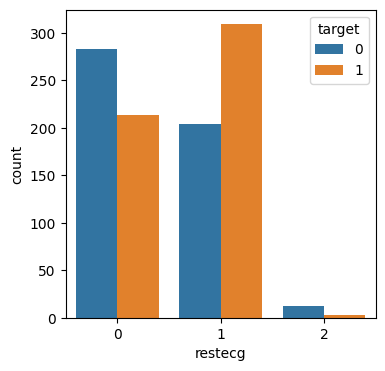

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.countplot(x=df['restecg'], hue=df['target'], data=df)

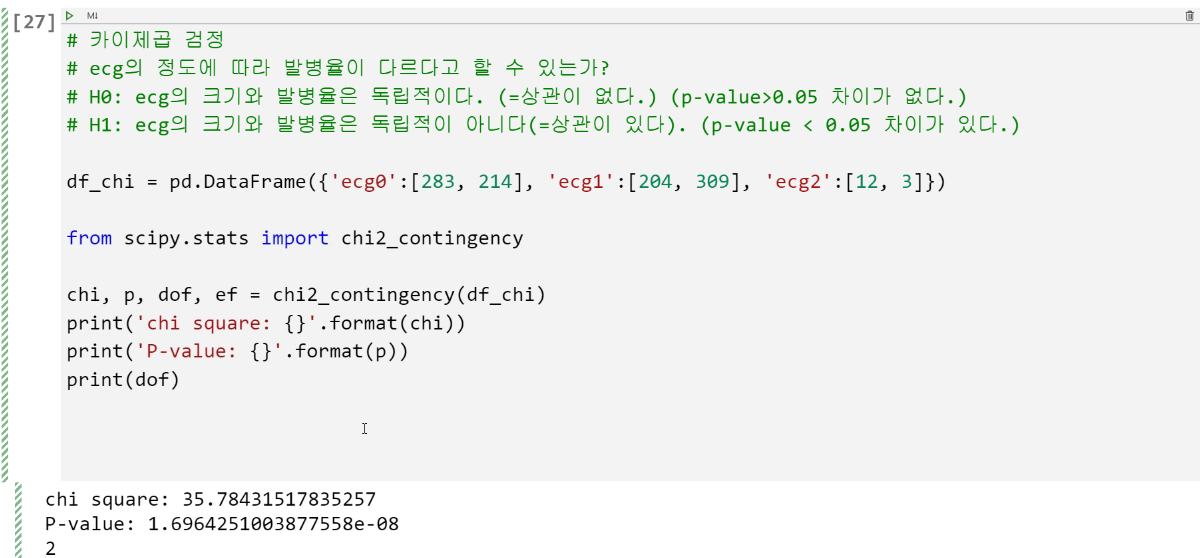

In [29]:
# 카이제곱 검정
# ECG의 정도에 따라 발병율이 다르다고 할 수 있는가?
# H0: ECG의 크기와 발병율은 독립적이다. (= 상관이 없다) (p-value>0.05 차이가 없다.)
# H1: ECG의 크기와 발별율은 독립적이 아니다. (= 상관이 있다.) (p-value<0.05 차이가 있다.)

df_chi = pd.DataFrame({'ecg0':[283, 214], 'ecg1': [204, 309], 'ecg':[12, 3]})

from scipy.stats import chi2_contingency

chi, p, dof, ef = chi2_contingency(df_chi)
print(f'chi squre : {chi}')
print(f'P-Value : {p}')
print(dof)

chi squre : 35.78431517835257
P-Value : 1.6964251003877558e-08
2
